### Case Retrieval using DTW k-NN

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import fbprophet
from fbprophet import Prophet
import os
import sklearn
import tslearn
from tslearn.neighbors import KNeighborsTimeSeries
from tslearn.utils import to_time_series_dataset
print(os.listdir())


C:\Users\eoind\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



['.ipynb_checkpoints', 'Case Retrieval with DTW K-NN.ipynb', 'Data Loadiing and Preparation.ipynb', 'features.csv', 'Prophet Forecast & Data Augmentation.ipynb', 'Sales_Data.csv', 'Sales_Data_.csv', 'sampleSubmission.csv', 'stores.csv', 'Stores_NN.csv', 'test.csv', 'train.csv', 'Training_Sales_Data.csv']


In [2]:
df = pd.read_csv('Sales_Data.csv', index_col = 0)
df.head()

,Store_ID,Store_Size,Weekly_Sales,Normalized_Weekly_Sales
2010-02-07,1,151315,1643690.90,1.057420
2010-02-14,1,151315,1641957.44,1.054348
2010-02-21,1,151315,1611968.17,1.001206
2010-02-28,1,151315,1409727.59,0.642828
2010-03-07,1,151315,1554806.68,0.899914


### DTW K-NN Search

In [3]:
#preparing the data for the k-NN search.
normalized_data = []

for store in range(1,46): #there are 45 unique stores in this dataset
    
    normalized_data.append(df[df['Store_ID']==store]['Normalized_Weekly_Sales'].values)
    
len(normalized_data)

45

In [4]:
normalized_data = [l.tolist() for l in normalized_data] #making a list of arrays into a list of lists

In [5]:
time_series = to_time_series_dataset(normalized_data) #converting to the from needed for dtw k-NN

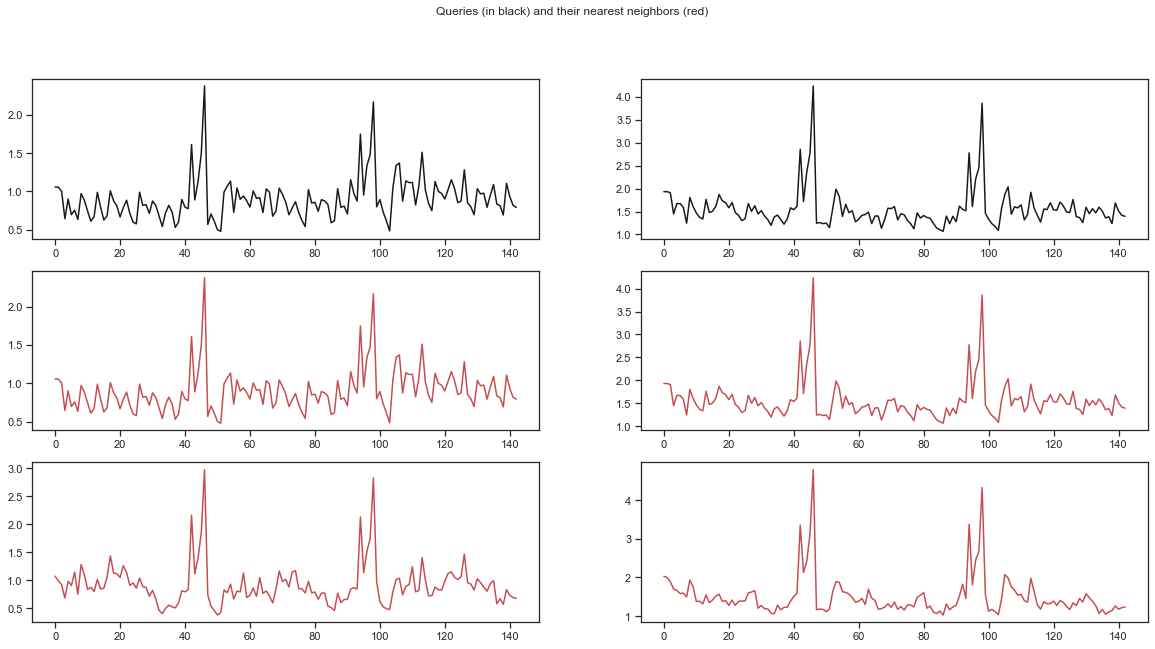

In [6]:
#https://tslearn.readthedocs.io/en/stable/gen_modules/tslearn.neighbors.html
# NB This code will return itself as a nearest neighbour. So the second red image is the NN. 
seed = 0
np.random.seed(seed)

n_queries = 2
n_neighbors = 2

knn = KNeighborsTimeSeries(n_neighbors=n_neighbors, metric='dtw')
knn.fit(time_series)
ind = knn.kneighbors(time_series[:n_queries], return_distance=False)

plt.figure(figsize=(20,10))
for idx_ts in range(n_queries):
    plt.subplot(n_neighbors + 1, n_queries, idx_ts + 1)
    plt.plot(time_series[idx_ts].ravel(), "k-")
    #plt.xticks([])
    for rank_nn in range(n_neighbors):
        plt.subplot(n_neighbors + 1, n_queries,
                    idx_ts + (n_queries * (rank_nn + 1)) + 1)
        plt.plot(time_series[ind[idx_ts, rank_nn]].ravel(), "r-")
        #plt.xticks([])
        
plt.suptitle("Queries (in black) and their nearest neighbors (red)")
plt.show()

In [7]:
ind
#Store 0's NN is Store 5 etc

array([[0, 5],
       [1, 9]], dtype=int64)

In [8]:
ind[:,1] # getting the nearest neigbour for each store.

array([5, 9], dtype=int64)

In [9]:
n_queries = 45
n_neighbors = 2

knn = KNeighborsTimeSeries(n_neighbors=n_neighbors, metric='dtw')
knn.fit(time_series)
ind = knn.kneighbors(time_series[:n_queries], return_distance=False)

In [10]:
ind[:,1]+1

#This is an array of the NN for each store based on store_id

# The store with ID of 1's NN is the store with ID of 6

array([ 6, 10, 38, 13, 44,  1, 16, 34, 29,  2, 31, 34,  4, 10, 25,  9,  8,
       22, 11,  4, 45, 18, 24, 11, 21, 40,  2, 11,  9,  3, 11, 18, 44,  8,
       12,  3, 42,  3, 23, 26, 24, 37, 42,  5, 21], dtype=int64)

In [11]:
df['Store_ID'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [12]:
stores_nn = zip(df['Store_ID'].unique(),ind[:,1]+1)

In [13]:
stores_nn = pd.DataFrame(stores_nn)
stores_nn.columns = [['Store_ID', '1-NN']]

In [14]:
stores_nn.head() # a dataframe of the stores ID and itS nearest neighbor

,Store_ID,1-NN
0,1,6
1,2,10
2,3,38
3,4,13
4,5,44


In [15]:
stores_nn.to_csv('Stores_NN.csv')